In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Get current working directory
print(f"Current working dir : {os.getcwd()}.")

Current working dir : /content.


In [ ]:
# Load evaluation labels
#validation_labels = np.load('/content/drive/MyDrive/Colab Notebooks/Experiment18-L32/validation_labels.npy')
test_labels = np.load('/content/drive/MyDrive/Colab Notebooks/Experiment18-L32/test_labels.npy')
labels = ['pituitary', 'glioma', 'meningioma', 'notumor']

# Load predictions
best_indiv_test_preds = np.load('/content/drive/MyDrive/Colab Notebooks/Experiment18-L32/bestindiv_test_preds.npy')
uniform_test_preds = np.load('/content/drive/MyDrive/Colab Notebooks/Experiment18-L32/uniform_test_preds.npy')
greedy_test_preds = np.load('/content/drive/MyDrive/Colab Notebooks/Experiment18-L32/greedy_test_preds.npy')
combi_test_preds = np.load('/content/drive/MyDrive/Colab Notebooks/Experiment18-L32/combi_test_preds.npy')

In [ ]:
def model_evaluate_ext(preds, eval_labels, model= None, eval_dataset = None):
    """
    Returns classification report and confusion matrix of a Model Soup.
    Args:
    model : Model Soup model (optional)
    eval_dataset : TFDS, Validation- or Test set (optional)
    preds: NumPy Array, Model Soup predictions
    eval_labels : NumPy Array, Labels of corresponding validation- or test set
    """
    
    if model is not None and eval_dataset is not None:
    # Generate predictions
      preds = model.predict(eval_dataset, verbose = 0)
      preds = preds.argmax(axis = 1)
    
    # Calculate accuracy
    acc = accuracy_score(eval_labels, preds)
    
    # Generate classification report
    report = classification_report(eval_labels, preds, target_names = labels, digits=5)
    
    # Generate confusion matrix
    cm = confusion_matrix(eval_labels, preds)
    cm = sns.heatmap(cm, annot = True, fmt = ".0f", cmap='Blues', yticklabels = labels, xticklabels = labels)

    return acc, report, cm

### Uniform Soup performance

Uniform Soup: Validation accuracy = 35.452586%.
--------------------------------------------------
              precision    recall  f1-score   support

   pituitary     0.4033    0.5654    0.4708       214
      glioma     0.3350    0.6256    0.4363       219
  meningioma     0.2188    0.1346    0.1667       260
     notumor     0.6102    0.1532    0.2449       235

    accuracy                         0.3545       928
   macro avg     0.3918    0.3697    0.3297       928
weighted avg     0.3879    0.3545    0.3202       928

--------------------------------------------------
Axes(0.125,0.11;0.62x0.77)


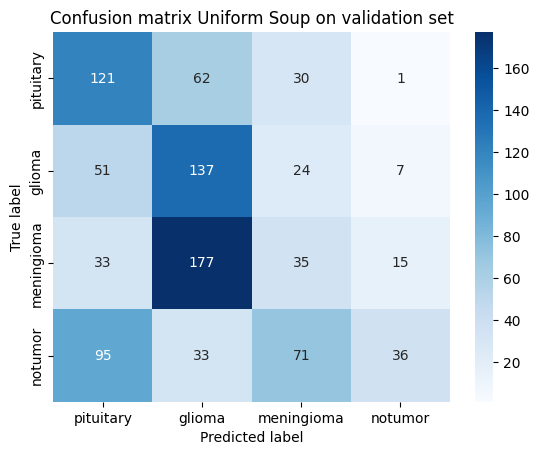

In [ ]:
# Evaluate Uniform Soup on validation set
uniform_val_acc, uniform_val_report, uniform_val_confmatrix = model_evaluate_ext(uniform_val_preds, validation_labels)

# Save confusion matrix as file
uniform_val_confmatrix.set(title=f'Confusion matrix Uniform Soup on validation set', xlabel = 'Predicted label', ylabel = 'True label')
uniform_val_confmatrix.get_figure().savefig(f'/content/drive/MyDrive/Colab Notebooks/modelsoups-exp6/confusion-matrix-uniform-val.png', dpi=400, bbox_inches = 'tight')

print(f'Uniform Soup: Validation accuracy = {uniform_val_acc*100:.6f}%.')
print('-'*50)
print(uniform_val_report)
print('-'*50)
print(uniform_val_confmatrix)

Uniform Soup: Test accuracy = 65.007112%.
--------------------------------------------------
              precision    recall  f1-score   support

   pituitary    0.71687   0.73457   0.72561       162
      glioma    0.46190   0.58788   0.51733       165
  meningioma    0.88372   0.95000   0.91566       200
     notumor    0.45536   0.28977   0.35417       176

    accuracy                        0.65007       703
   macro avg    0.62946   0.64055   0.62819       703
weighted avg    0.63902   0.65007   0.63780       703

--------------------------------------------------
Axes(0.125,0.11;0.62x0.77)


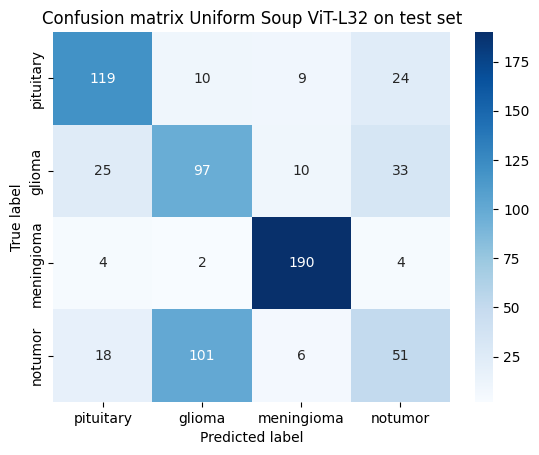

In [ ]:
# Evaluate Uniform Soup on test set
uniform_test_acc, uniform_test_report, uniform_test_confmatrix = model_evaluate_ext(uniform_test_preds, test_labels)

# Save confusion matrix as file
uniform_test_confmatrix.set(title=f'Confusion matrix Uniform Soup ViT-L32 on test set', xlabel = 'Predicted label', ylabel = 'True label')
uniform_test_confmatrix.get_figure().savefig(f'/content/drive/MyDrive/Colab Notebooks/Experiment18-L32/confusion-matrix-uniform-testl32.png', dpi=400, bbox_inches = 'tight')

print(f'Uniform Soup: Test accuracy = {uniform_test_acc*100:.6f}%.')
print('-'*50)
print(uniform_test_report)
print('-'*50)
print(uniform_test_confmatrix)

### Greedy Soup performance

Greedy Soup: Validation accuracy = 95.043103%.
--------------------------------------------------
              precision    recall  f1-score   support

   pituitary     0.9231    0.9533    0.9379       214
      glioma     0.9453    0.8676    0.9048       219
  meningioma     0.9961    0.9808    0.9884       260
     notumor     0.9320    0.9915    0.9608       235

    accuracy                         0.9504       928
   macro avg     0.9491    0.9483    0.9480       928
weighted avg     0.9510    0.9504    0.9500       928

--------------------------------------------------
Axes(0.125,0.11;0.62x0.77)


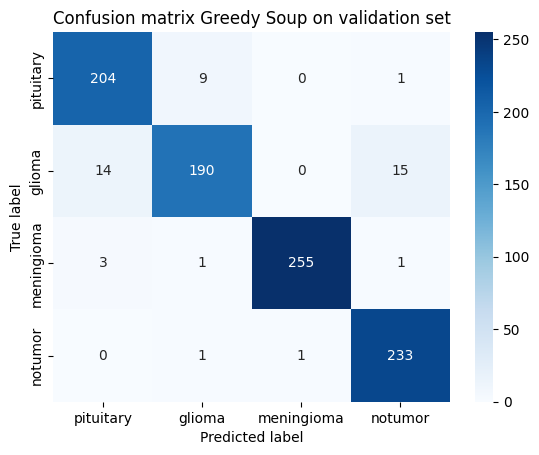

In [ ]:
# Evaluate Greedy Soup on validation set
greedy_val_acc, greedy_val_report, greedy_val_confmatrix = model_evaluate_ext(greedy_val_preds, validation_labels)

# Save confusion matrix as file
greedy_val_confmatrix.set(title=f'Confusion matrix Greedy Soup on validation set', xlabel = 'Predicted label', ylabel = 'True label')
greedy_val_confmatrix.get_figure().savefig(f'/content/drive/MyDrive/Colab Notebooks/modelsoups-exp6/confusion-matrix-greedy-val.png', dpi=400, bbox_inches = 'tight')

print(f'Greedy Soup: Validation accuracy = {greedy_val_acc*100:.6f}%.')
print('-'*50)
print(greedy_val_report)
print('-'*50)
print(greedy_val_confmatrix)

Greedy Soup: Test accuracy = 95.305832%.
--------------------------------------------------
              precision    recall  f1-score   support

   pituitary    0.96774   0.92593   0.94637       162
      glioma    0.90798   0.89697   0.90244       165
  meningioma    1.00000   0.98500   0.99244       200
     notumor    0.93085   0.99432   0.96154       176

    accuracy                        0.95306       703
   macro avg    0.95164   0.95055   0.95070       703
weighted avg    0.95366   0.95306   0.95296       703

--------------------------------------------------
Axes(0.125,0.11;0.62x0.77)


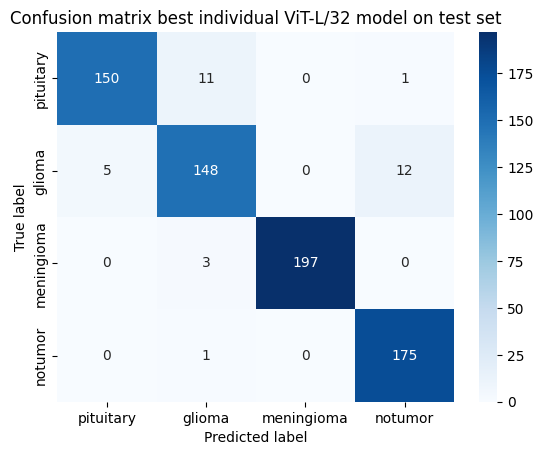

In [ ]:
# Evaluate Greedy Soup on test set
greedy_test_acc, greedy_test_report, greedy_test_confmatrix = model_evaluate_ext(best_indiv_test_preds, test_labels)

# Save confusion matrix as file
greedy_test_confmatrix.set(title=f'Confusion matrix best individual ViT-L/32 on test set', xlabel = 'Predicted label', ylabel = 'True label')
greedy_test_confmatrix.get_figure().savefig(f'/content/drive/MyDrive/Colab Notebooks/Experiment18-L32/confusion-matrix-bestindivL32-test.png', dpi=400, bbox_inches = 'tight')

print(f'Greedy Soup: Test accuracy = {greedy_test_acc*100:.6f}%.')
print('-'*50)
print(greedy_test_report)
print('-'*50)
print(greedy_test_confmatrix)

Combi Soup: Test accuracy = 95.305832%.
--------------------------------------------------
              precision    recall  f1-score   support

   pituitary    0.96774   0.92593   0.94637       162
      glioma    0.90798   0.89697   0.90244       165
  meningioma    1.00000   0.98500   0.99244       200
     notumor    0.93085   0.99432   0.96154       176

    accuracy                        0.95306       703
   macro avg    0.95164   0.95055   0.95070       703
weighted avg    0.95366   0.95306   0.95296       703

--------------------------------------------------
Axes(0.125,0.11;0.62x0.77)


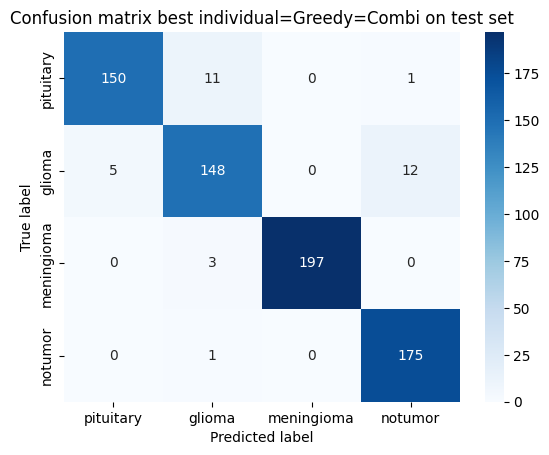

In [ ]:
# Evaluate Greedy Soup on test set
combi_test_acc, combi_test_report, combi_test_confmatrix = model_evaluate_ext(combi_test_preds, test_labels)

# Save confusion matrix as file
combi_test_confmatrix.set(title=f'Confusion matrix Combi Soup on test set', xlabel = 'Predicted label', ylabel = 'True label')
combi_test_confmatrix.get_figure().savefig(f'/content/drive/MyDrive/Colab Notebooks/Experiment18-L32/confusion-matrix-combi-test.png', dpi=400, bbox_inches = 'tight')

print(f'Combi Soup: Test accuracy = {combi_test_acc*100:.6f}%.')
print('-'*50)
print(combi_test_report)
print('-'*50)
print(combi_test_confmatrix)